## Import libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,19/06/2012,ORD,DFW,12.875000,12.331296,9.812647
1,10/09/2012,LAS,DEN,14.285714,10.775182,9.466734
2,05/10/2012,DEN,LAX,10.863636,11.083177,9.035883
3,09/10/2011,ATL,ORD,11.480000,11.169268,7.990202
4,21/02/2012,DEN,SFO,11.450000,11.269364,9.517159


In [5]:
len(data)

8902

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateOfDeparture   8902 non-null   object 
 1   Departure         8902 non-null   object 
 2   Arrival           8902 non-null   object 
 3   WeeksToDeparture  8902 non-null   float64
 4   log_PAX           8902 non-null   float64
 5   std_wtd           8902 non-null   float64
dtypes: float64(3), object(3)
memory usage: 417.4+ KB


In [21]:
data.describe()

,WeeksToDeparture,log_PAX,std_wtd
count,8902.000000,8902.000000,8902.000000
mean,11.446469,10.999048,8.617773
std,2.787140,0.993945,2.139604
min,2.625000,3.878108,2.160247
25%,9.523810,10.427055,7.089538
50%,11.300000,11.013357,8.571116
75%,13.240000,11.592888,10.140521
max,23.163265,14.007791,15.862216


In [15]:
data["DateDay"] = data["DateOfDeparture"].str.slice(0, 2)
data["DateMonth"] = data["DateOfDeparture"].str.slice(3, 5)
data["DateYear"] = data["DateOfDeparture"].str.slice(6, 10)
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,DateDay,DateMonth,DateYear
0,19/06/2012,ORD,DFW,12.875000,12.331296,9.812647,19,06,2012
1,10/09/2012,LAS,DEN,14.285714,10.775182,9.466734,10,09,2012
2,05/10/2012,DEN,LAX,10.863636,11.083177,9.035883,05,10,2012
3,09/10/2011,ATL,ORD,11.480000,11.169268,7.990202,09,10,2011
4,21/02/2012,DEN,SFO,11.450000,11.269364,9.517159,21,02,2012


In [20]:
data.to_csv("data/data_cleaned.csv")

In [48]:
depart_count = data.groupby("Departure").log_PAX.count()
depart_count

Departure
ATL     990
BOS     509
CLT     161
DEN     640
DFW     648
DTW     228
EWR     410
IAH     140
JFK     364
LAS     419
LAX     758
LGA     466
MCO     202
MIA     233
MSP     230
ORD    1038
PHL     354
PHX     139
SEA     280
SFO     693
Name: log_PAX, dtype: int64

Text(0.5, 1.0, 'Number of flights per departure airport')

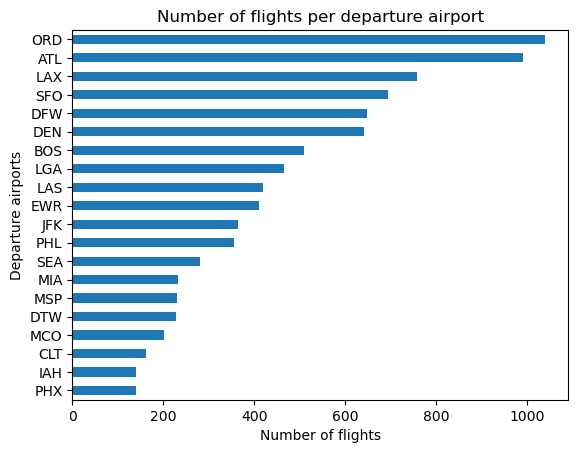

In [47]:
depart_count.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of flights")
plt.ylabel("Departure airports")
plt.title("Number of flights per departure airport")

In [46]:
arr_count = data.groupby("Arrival").log_PAX.count()
arr_count

Arrival
PHX     137
CLT     139
IAH     141
DTW     195
MSP     207
MIA     213
SEA     273
MCO     287
JFK     292
PHL     365
EWR     413
LAS     436
LGA     496
DFW     558
BOS     578
DEN     615
SFO     692
LAX     764
ATL    1000
ORD    1101
Name: log_PAX, dtype: int64

Text(0.5, 1.0, 'Number of flights per arrival airport')

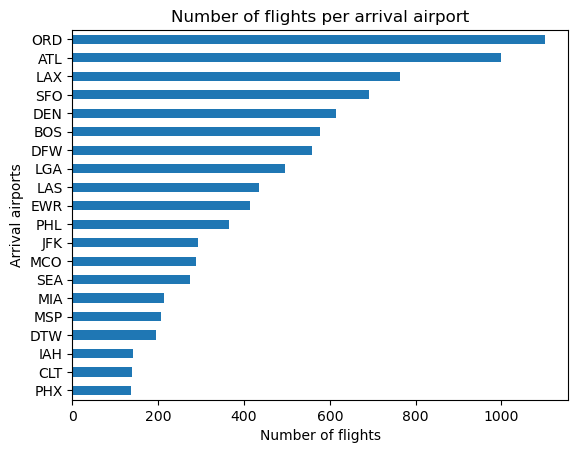

In [49]:
arr_count.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of flights")
plt.ylabel("Arrival airports")
plt.title("Number of flights per arrival airport")